### Import libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [9]:
df = pd.read_csv("../data/Books_Data_Clean.csv")
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [10]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [23]:
#check duplicate
df.duplicated().sum()

np.int64(0)

### Clean Data

In [16]:
#check for null
df.isnull().sum()

index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

In [12]:
#drop null in Book Name column
df.dropna(subset= "Book Name", inplace=True)

In [17]:
# fill missing columns in language code with most popular
df["language_code"] = df["language_code"].fillna(df["language_code"].mode()[0])
# check if any missing values
df.isnull().sum()


index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64

### Analyze Data

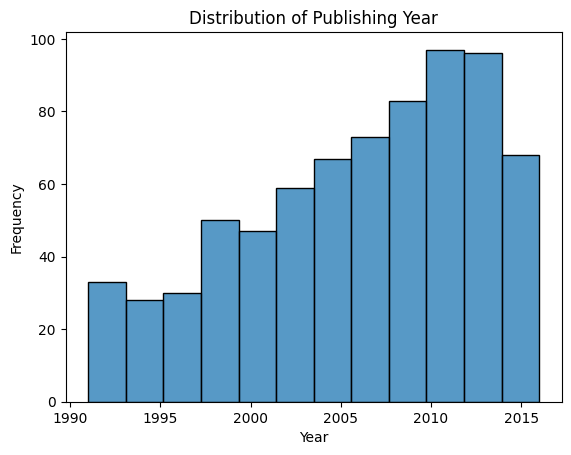

In [30]:
#Distribution of publishing year from 1990
data = df[df['Publishing Year'] > 1990]
sns.histplot(data['Publishing Year'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Distribution of Publishing Year")
plt.show()

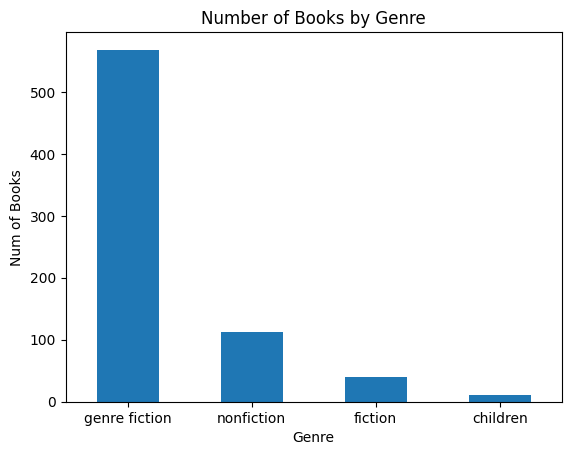

In [29]:
# Number of books by genres
data['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Num of Books')
plt.title('Number of Books by Genre')
plt.xticks(rotation=0)
plt.show()

In [33]:
#Rating by Author
data.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
George R.R. Martin                4.560000
Sarah J. Maas                     4.526000
Hiromu Arakawa, Akira Watanabe    4.490000
Cassandra Clare                   4.480000
Robert Kirkman                    4.430000
                                    ...   
Chetan Bhagat                     3.273333
Audrey Niffenegger                3.230000
Herman Koch, Sam Garrett          3.220000
P.D. James                        3.210000
Sue Monk Kidd                     3.100000
Name: Book_average_rating, Length: 470, dtype: float64

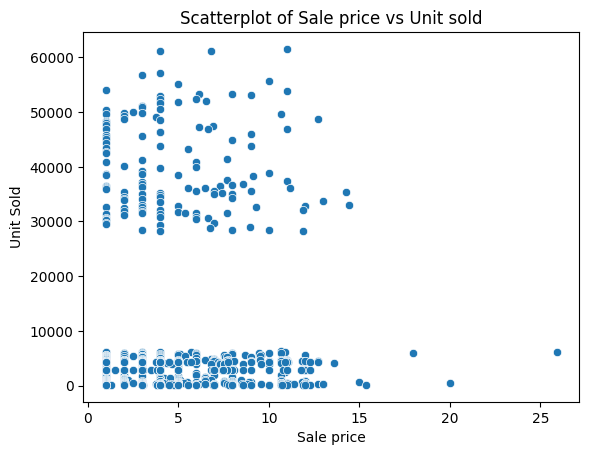

In [35]:
# Sale price and unit sold
sns.scatterplot(x='sale price', y='units sold', data = data)
plt.xlabel('Sale price')
plt.ylabel('Unit Sold')
plt.title('Scatterplot of Sale price vs Unit sold')
plt.show()

In [54]:
# Language distribution
data['language_code'].value_counts()


language_code
eng      530
en-US    172
en-GB     18
en-CA      4
fre        3
ara        2
spa        1
nl         1
Name: count, dtype: int64

In [47]:
# revenue by publisher
data.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 128647.002
Random House LLC                        120250.824
Amazon Digital Services,  Inc.          109249.368
HarperCollins Publishers                 80419.890
Hachette Book Group                      78907.236
Simon and Schuster Digital Sales Inc     29628.912
Macmillan                                24943.146
HarperCollins Christian Publishing        2135.670
HarperCollins Publishing                  2127.654
Name: publisher revenue, dtype: float64

In [ ]:
# Author_Rating and book_average_rating
data.groupby("Author_Rating")["Book_average_rating"].mean().sort_values(ascending=False)

Author_Rating
Famous          4.445526
Excellent       4.171017
Intermediate    3.888502
Novice          3.358696
Name: Book_average_rating, dtype: float64

In [55]:
# Author_Rating and book_average_count
data.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False)

Author_Rating
Famous          98915.710526
Intermediate    97485.152074
Excellent       85308.305085
Novice          82425.869565
Name: Book_ratings_count, dtype: float64

In [57]:
#Gross Sales by Author
sales_author = data.groupby("Author")["gross sales"].sum().sort_values(ascending=False).head(10)
sales_author

Author
Harper Lee           47795.00
David Sedaris        42323.41
Charlaine Harris     39453.08
Laini Taylor         38278.41
Sarah Dessen         31034.85
Colleen Hoover       29706.14
Jeffrey Eugenides    27984.38
Charles Duhigg       27491.67
John Berendt         26182.00
Nick Hornby          21835.82
Name: gross sales, dtype: float64

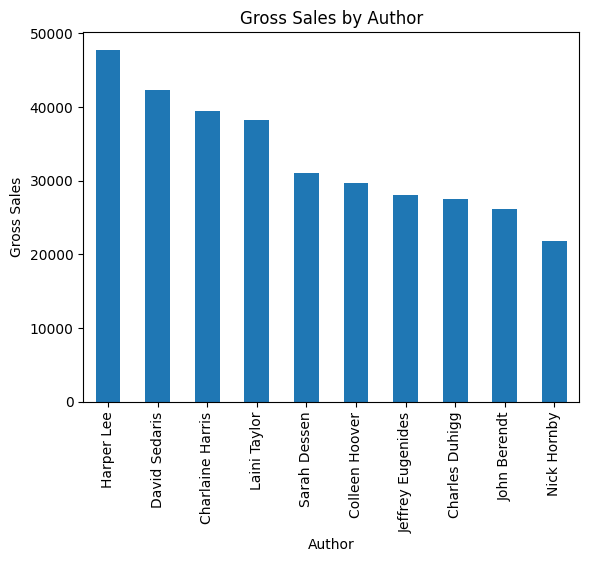

In [60]:
sales_author.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Gross Sales')
plt.title('Gross Sales by Author')
plt.show()

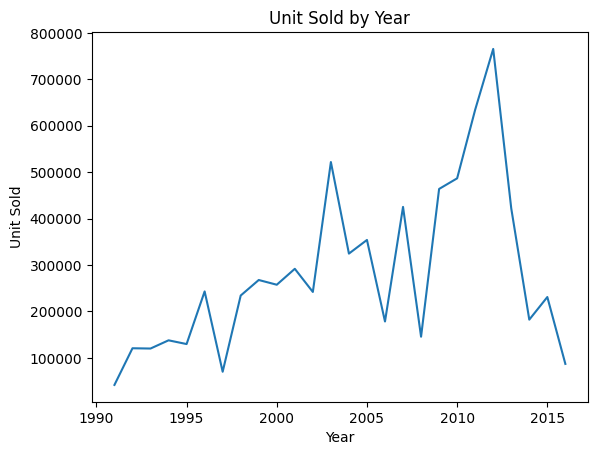

In [63]:
#Units sold by year
data.groupby('Publishing Year')['units sold'].sum().plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Unit Sold')
plt.title('Unit Sold by Year')
plt.show()